# Frequentist Inference Case Study - Part B

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

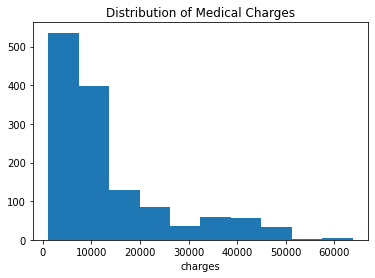

In [5]:
plt.hist(medical["charges"])
plt.xlabel('charges')
plt.title('Distribution of Medical Charges')
plt.show()

In [6]:
the_mean = np.mean(medical["charges"])
the_std = np.std(medical["charges"])

print(f"The mean is: {the_mean} and the standard deviation is: {the_std}")

The mean is: 13270.422265141257 and the standard deviation is: 12105.484975561605


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

So, the question is, has the actual avarage (mean) charge fallen below? This data can be used to answer the question using a t-test. Since the statistic of importance is the mean,(even though the distribution of the individual charges is not normal, the distribution of random sample means will be normal and the CLT holds) we can make inference about it using the calculated mean and standard deviation from our random sample of charges.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__
The appropriate interval is a one-sided interval since the Administrator is concerned if the avarage cahrges has fallen below 12000.

$H_0:μ < 12000$ <br>
$H_a:μ \ge 12000$ <br>

The Confidence Interval formula is:<br>
$\overline{x} \pm t^* \frac{s}{\sqrt{n}}$ <br>
where:
* $\overline{x}$ is the estimated population mean, 
* $t^*$ is the t-value for $1-C$,
* $s$ is the population standard deviation, and 
* $n$ is the number of observations

In [8]:
#n is the size of the medical["charges"]
n = len(medical["charges"])
print(f"The sample size is: {n}")
#we calculate the sample mean and standard deviation, which are the estimated population statistics
pop_mean = np.mean(medical["charges"])
#standard deviation using the Bessel's correction
pop_std = np.std(medical["charges"], ddof=1)
print(f"The estimated population mean is {pop_mean}, and the estimated standard deviation is: {pop_std}")

The sample size is: 1338
The estimated population mean is 13270.422265141257, and the estimated standard deviation is: 12110.011236693994


In [9]:
t_value = t.ppf(.05, df=n-1)
print(f"The Critical value is: {t_value}")
margin = t_value * (pop_std / np.sqrt(n))
lowest_mean = pop_mean + margin
print(f"The lovest value of the mean is: {lowest_mean}")

The Critical value is: -1.6459941145571324
The lovest value of the mean is: 12725.48718381623


From the above, the Administrator should not be concerned

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
Here our null hypothesis is that the avarage charge for insured and uninsured patients is the same, and alternative hypothesis is the avarage charges are not the same, with the assumption that the two groups have the same varience.<br>

let $\overline{x}_0$ be the average charge for uninsured patients and $\overline{x}_1$ be the avarage charge for insured patients, then:<br>

$H_0:\overline{x}_0 = \overline{x}_1$<br>
$H_a:\overline{x}_0 \neq \overline{x}_1$

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ <br>
let, $x_0$ be the group of patients that are not insured and $x_1$ be the group of patients that are insured

In [10]:
#we will create the two groups of patients 
x_0 = medical["charges"][medical["insuranceclaim"] == 0]
x_1 = medical["charges"][medical["insuranceclaim"] == 1]
print(f"The shape of x_0: {x_0.shape} and the shape of x_1: {x_1.shape}")
n_0, n_1 = len(x_0), len(x_1)
#we calculate the means and standard deviations 
x_bar_0, x_bar_1 = np.mean(x_0), np.mean(x_1)
s_0, s_1 = np.std(x_0, ddof=1), np.std(x_1, ddof=1)
print(f"for x_0 \n mean: {x_bar_0} and standard deviation: {s_0}")
print(f"for x_1 \n mean: {x_bar_1} and standard deviation: {s_1}")

The shape of x_0: (555,) and the shape of x_1: (783,)
for x_0 
 mean: 8821.421892306294 and standard deviation: 6446.510126811736
for x_1 
 mean: 16423.928276537663 and standard deviation: 14045.928418802127


In [11]:
#Using the above formulars we will calculate the pooled standard deviation of the two groups and the t-test statistic 
N = n_0 + n_1
df = N - 2
#first the pooled standard deviation
s_p = np.sqrt(((n_0 - 1) * s_0**2 + (n_1 - 1) * s_1**2) /(N - 2))
print(f"The pooled standard deviation: {s_p}")
#the t-test statistic
t_value = (x_bar_0 - x_bar_1) / (s_p * np.sqrt(1/n_0 + 1/n_1))
print(f"The t-test statistic: {t_value}")
#and now the pvalue
p_value = 2 * t.cdf(t_value, df=df)
print(f"The p_value: {p_value}")

The pooled standard deviation: 11520.034268775256
The t-test statistic: -11.89329903087671
The p_value: 4.461230231620972e-31


In [14]:
#using the ttest_ind() fuction from scipy that calculates the T-test for the means of two independent samples of scores, we can verify the above
#This is a test for the null hypothesis that 2 independent samples have identical average (expected) values
#This test assumes that the populations have identical variances by default.
from scipy.stats import ttest_ind
ttest_ind(x_0,x_1)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__
There is no equivalent z-test for a sample since the population mean and standard deviation are unknown; however, you can use 'scipy.stats.zscore' to compute the z score of each value in the sample, relative to the sample mean and standard deviation.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test